In [1]:
#STEP 1: Import Libraries/Datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

[6]


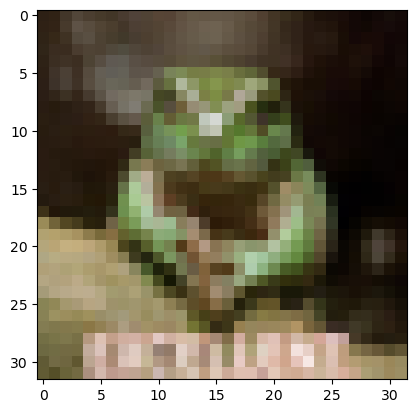

In [3]:
#STEP 2: Visualize Data
i = 4999
plt.imshow(X_train[i])
print(y_train[i])

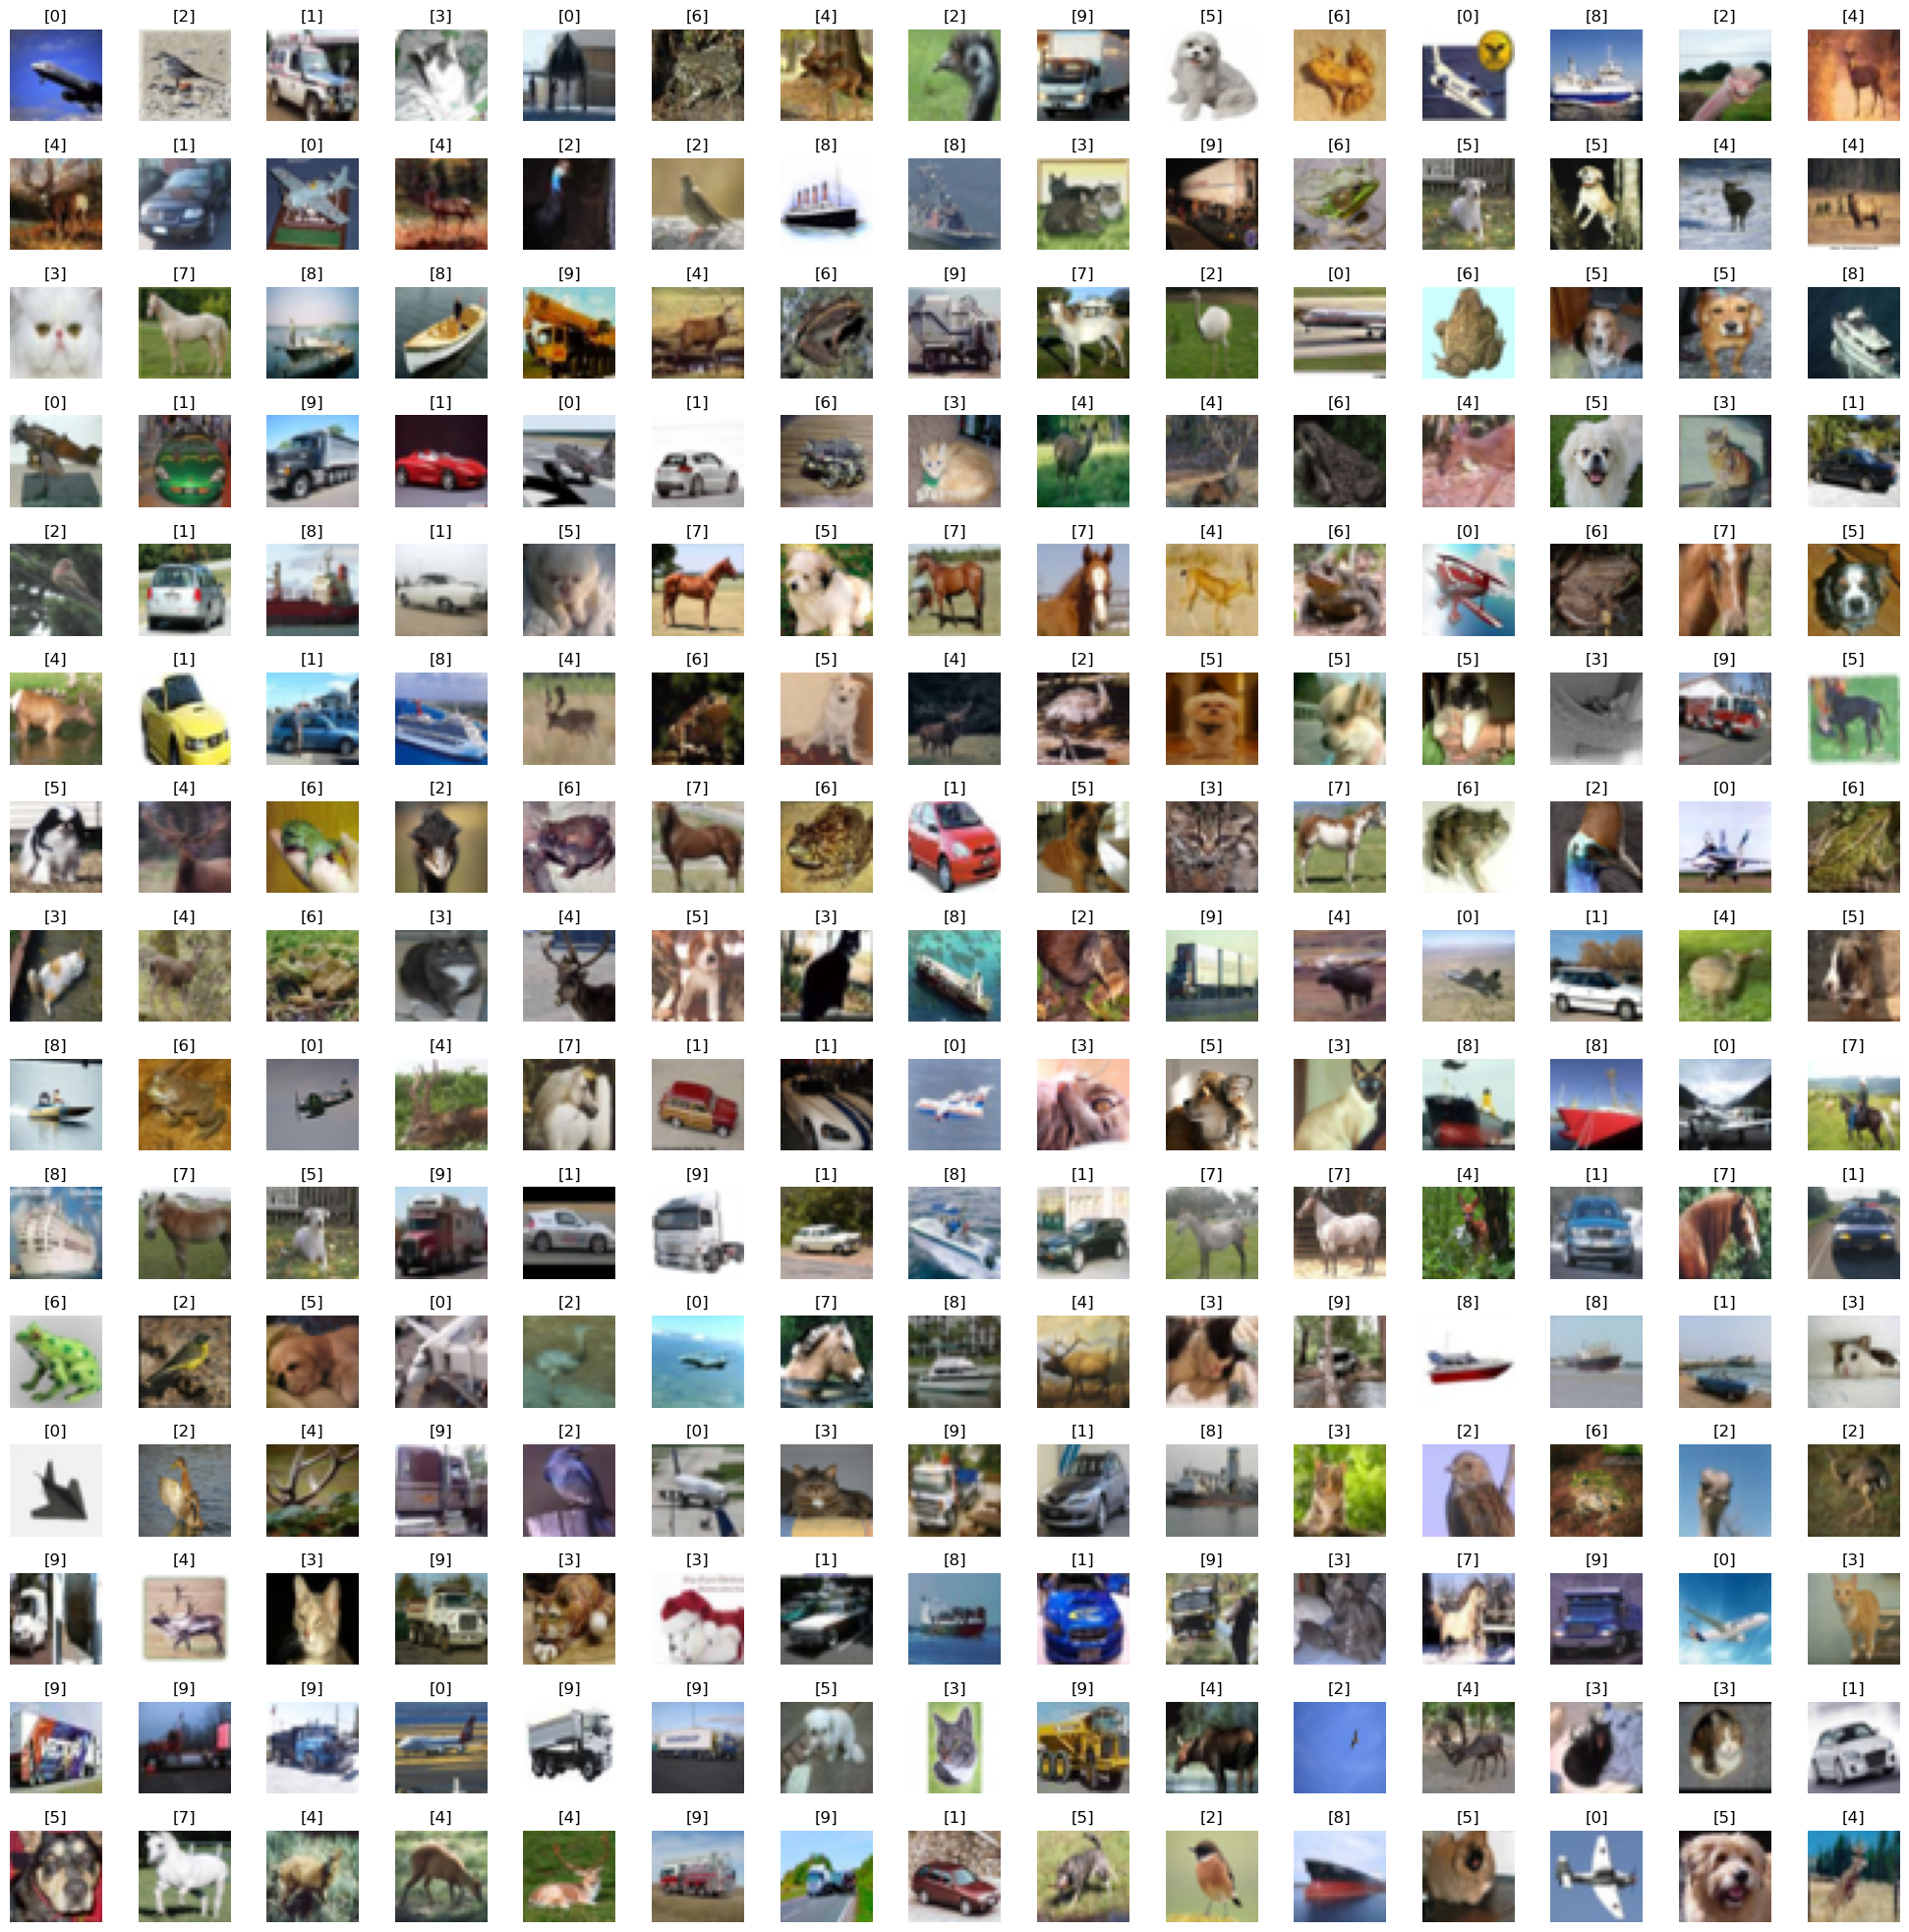

In [4]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_traning = len(X_train)
for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_traning)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [5]:
#STEP 3: Data Preparation
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
import keras

number_cat = 10

#Decimal to Binary with 10 digits
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
#Normalizing the Input
X_train = X_train/255
X_test = X_test/255

X_train

(50000, 32, 32, 3)

In [8]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [ ]:
#STEP 4: Train the Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [10]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 512, activation = 'relu'))

numberClasses = 10
cnn_model.add(Dense(units = numberClasses, activation = 'softmax'))

c:\Users\matan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [14]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.3161 - loss: 1.8500
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5665 - loss: 1.2282


In [ ]:
#STEP 5: Evaluate the Model